Reading the .csv file and creating a dataframe using pandas library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

In [4]:
df = pd.read_csv("43.csv")
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,99.0,85.0,88.0
1,female,group C,some high school,free/reduced,none,96.0,103.0,102.0
2,male,group C,master's degree,free/reduced,none,117.0,29.0,107.0
3,female,group C,high school,free/reduced,completed,74.0,70.0,58.0
4,female,group C,associate's degree,free/reduced,none,103.0,98.0,89.0


<style type='text/css'>

*{font-size: 24px;
}
</style>Data cleaning

<style type='text/css'>

*{font-size: 20px;
}
</style>
handling impossible values (replacing with nan)
--solution to first half of introductory question 2

In [15]:


#checking how many values greater than 100
(df["math score"]>100).sum()##----309 VALUES

#checking how many values less than 0
(df["math score"]<0).sum() ##----0 VALUES


df['math score']=df['math score'].apply(lambda x: np.nan if (x > 100 or x < 0) else x)

#do the same for reading score and writing score
df['reading score']=df['reading score'].apply(lambda x: np.nan if (x > 100 or x < 0) else x)

df['writing score']=df['writing score'].apply(lambda x: np.nan if (x > 100 or x < 0) else x)



<style type='text/css'>

*{font-size: 20px;
}
</style>
replacing Nan values in marks with respective means

In [29]:
mathscoremean = df['math score'].mean()
readingscoremean = df['reading score'].mean()
writingscoremean = df['writing score'].mean()

df['math score'].fillna(mathscoremean,inplace=True)
df['reading score'].fillna(readingscoremean, inplace=True)
df['writing score'].fillna(writingscoremean, inplace=True)
df['math score']



0      99.000000
1      96.000000
2      83.587464
3      74.000000
4      83.587464
         ...    
995    83.587464
996    89.000000
997    86.000000
998    95.000000
999    83.587464
Name: math score, Length: 1000, dtype: float64

<style type='text/css'>

*{font-size: 20px;
}
</style>
calculating and adding percentages column

--solution to introductory question 1
-- done by calculating sum of marks columns and dividing by 3

In [35]:
df['percentage'] =df.iloc[:,-3:-1].sum(axis=1)/3


<style type='text/css'>

*{font-size: 20px;
}
</style>
Removing any row with missing categorical data
--solution to second half of introductory question 2

In [40]:
df.dropna(subset=['gender', 'race', 'parental level of education', 'lunch',
                  'test preparation course'],inplace=True)

In [49]:
df['reading score'].min()

22.0

<style type='text/css'>

*{font-size: 24px;
}
</style>
Plotting the reading score

<style type='text/css'>

*{font-size: 20px;
}
</style>
plot of the marks scored by 100 students

<AxesSubplot:>

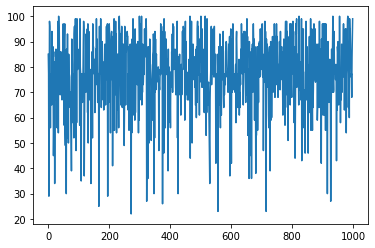

In [53]:
readingscores = df['reading score']
readingscores.plot()


Text(0.5, 1.0, 'reading score histogram')

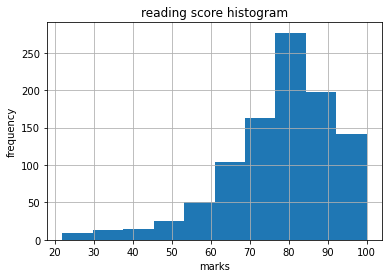

In [55]:

readingscores.hist()
plt.ylabel("frequency")
plt.xlabel("marks")
plt.title('reading score histogram')


((array([-3.19614407e+00, -2.93082153e+00, -2.78275298e+00, -2.67831789e+00,
         -2.59683872e+00, -2.52964120e+00, -2.47223199e+00, -2.42197180e+00,
         -2.37717389e+00, -2.33669258e+00, -2.29971295e+00, -2.26563401e+00,
         -2.23399937e+00, -2.20445406e+00, -2.17671631e+00, -2.15055863e+00,
         -2.12579459e+00, -2.10226944e+00, -2.07985327e+00, -2.05843592e+00,
         -2.03792314e+00, -2.01823365e+00, -1.99929684e+00, -1.98105096e+00,
         -1.96344170e+00, -1.94642103e+00, -1.92994625e+00, -1.91397921e+00,
         -1.89848574e+00, -1.88343502e+00, -1.86879924e+00, -1.85455314e+00,
         -1.84067379e+00, -1.82714021e+00, -1.81393324e+00, -1.80103530e+00,
         -1.78843018e+00, -1.77610299e+00, -1.76403993e+00, -1.75222824e+00,
         -1.74065607e+00, -1.72931241e+00, -1.71818701e+00, -1.70727031e+00,
         -1.69655335e+00, -1.68602778e+00, -1.67568575e+00, -1.66551991e+00,
         -1.65552333e+00, -1.64568950e+00, -1.63601229e+00, -1.62648591e+00,

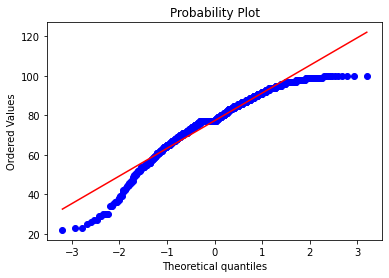

In [60]:
scipy.stats.probplot(readingscores.values, dist="norm", plot=plt)


<style type='text/css'>

*{font-size: 22px;
color:orange
}
</style>
<p>Excluding Outliers the distribution is normal<p>
<p>f(x) =1/(sd*root(2*pi)*e^(-1/2*(x-mean)/sd)^2)</p>
<p>mean medain mode are equal</p>
<p>distribution can be described by the mean and median</p>

<style type='text/css'>

*{font-size: 20px;
}
</style>
generate grades of students

In [65]:
def grade(x):
    if(x>90 and x<100):
        return 'S'
    elif(x>80):
        return 'A'
    elif(x>70):
        return 'B'
    elif(x>60):
        return 'C'
    elif(x>40):
        return 'D'
    else:
        return 'F'


df['grade']=df['percentage'].apply(lambda x:grade(x))
df['grade'].head()


0    D
1    D
2    F
3    D
4    C
Name: grade, dtype: object

C:\Users\prach\AppData\Local\Temp/ipykernel_10724/1648020781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parent_percentage_relation['gender'] = parent_percentage_relation['gender'].str.lower()


<AxesSubplot:xlabel='parental level of education'>

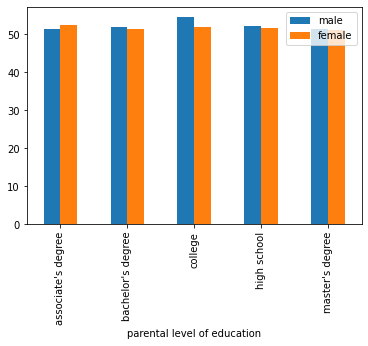

In [159]:
#replacing some high school with high school and some college with college 
df['parental level of education'].replace('some high school','high school',inplace=True)
df['parental level of education'].replace(
    'some college', 'college', inplace=True)
parent_percentage_relation = df[['parental level of education', 'percentage','gender']]
parent_percentage_relation.dropna(subset=['gender'],inplace=True)
parent_percentage_relation['gender'] = parent_percentage_relation['gender'].str.lower()
parent_percentage_relation_male = parent_percentage_relation[parent_percentage_relation['gender']=='male']
parent_percentage_relation_female = parent_percentage_relation[parent_percentage_relation['gender'] == 'female']
parent_percentage_relation_male = parent_percentage_relation_male.groupby(
    ['parental level of education']).mean()
parent_percentage_relation_female = parent_percentage_relation_female.groupby(
    ['parental level of education']).mean()

ppgr = pd.DataFrame()
# ppgr['parental level of education'] =parent_percentage_relation_female['parental level of education'].values
ppgr['male'] = parent_percentage_relation_male['percentage'].values
ppgr['female']=parent_percentage_relation_female['percentage'].values

ppgr['parental level of education']=(parent_percentage_relation_male.index)
ppgr.plot(x='parental level of education',y=["male", "female"], kind="bar")


<style type='text/css'>

*{font-size: 24px;
color:lightgreen
}
</style>
Task questions

In [120]:

set(df['race'].values) # checking if there are impossible values
df['race'].isnull().sum() # no nan values

simrstudents = df.sample(n=100)
stratstudents =df.groupby('race', group_keys=False).apply(lambda x: x.sample(frac = 0.0997))
simmathmean = simrstudents['math score'].mean()
stratmathmean = stratstudents['math score'].mean()

simerror = mathscoremean - simmathmean
straterror = stratmathmean - mathscoremean


<style type='text/css'>

p{font-size: 20px;
color:lightgreen
}
</style>
<p>simple random sampling mean = 82.36736151603498</p>
<p>stratified random sampling mean =  84.15386297376095</p>

<p>sampling error in simple random sampling = 1.220102040816343</p>
<p>sampling error in stratified random sampling = 0.5663994169096327</p>

<font color= 'orange' font-size='26px'>Sampling Error is lower in case of stratified random sampling</font>

In [118]:
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grades,grade
0,female,group B,bachelor's degree,standard,none,99.000000,85.00000,88.000000,57.666667,D,D
1,female,group C,high school,free/reduced,none,96.000000,77.35078,77.903955,51.751578,D,D
2,male,group C,master's degree,free/reduced,none,83.587464,29.00000,77.903955,35.634652,F,F
3,female,group C,high school,free/reduced,completed,74.000000,70.00000,58.000000,42.666667,D,D
4,female,group C,associate's degree,free/reduced,none,83.587464,98.00000,89.000000,62.333333,C,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group A,high school,standard,none,83.587464,77.35078,77.903955,51.751578,D,D
996,male,group B,bachelor's degree,standard,none,89.000000,68.00000,69.000000,45.666667,D,D
997,female,group C,associate's degree,standard,none,86.000000,84.00000,79.000000,54.333333,D,D
998,female,group D,bachelor's degree,free/reduced,none,95.000000,91.00000,91.000000,60.666667,C,C


<style type='text/css'>

*{font-size: 22px;
color:lightgreen
}
</style>
Plotting bar graph of race distibution in samples

<style type='text/css'>

*{font-size: 22px;
color:lightgreen
}
</style>
Simple random sampling (Bar graph with respect to race)

<AxesSubplot:>

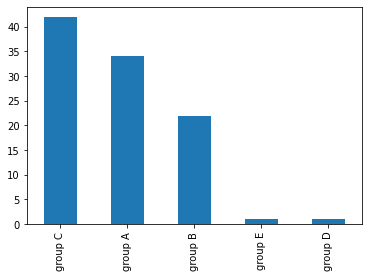

In [130]:
simrstudents['race'].value_counts().plot(kind='bar')



<style type='text/css'>

*{font-size: 22px;
}
</style>
Stratified random sampling (Bar graph with respect to race)

<AxesSubplot:>

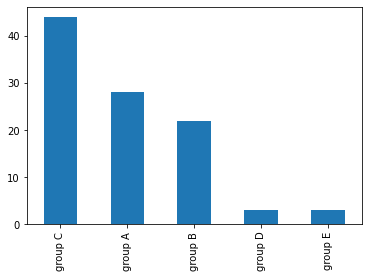

In [131]:
stratstudents['race'].value_counts().plot(kind='bar')


<style type='text/css'>
*{font-size: 22px;
    color:lightgreen
}
</style>
<p>Population(Bar graph with respect to race)</p>

<AxesSubplot:>

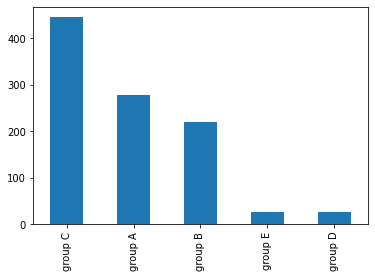

In [132]:
df['race'].value_counts().plot(kind='bar')


<style type='text/css'>

*{font-size: 22px;
color:orange
}
</style>
<p>The graphs for simple and stratified random sampling are very similar to that of the Population<p>
<p>However the stratified random sample has better representation of the distribution of race in the actual population</p>

<AxesSubplot:title={'center':'writing score'}, xlabel='race'>

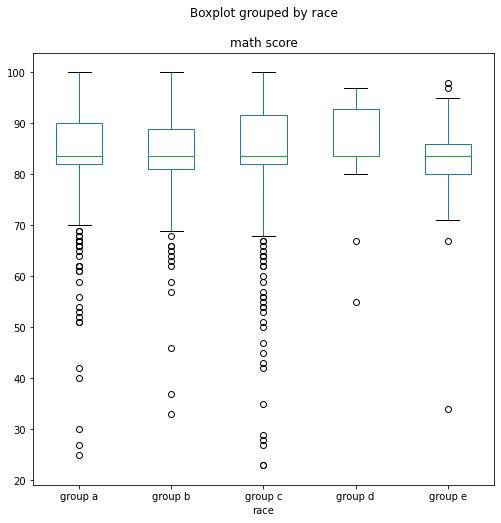

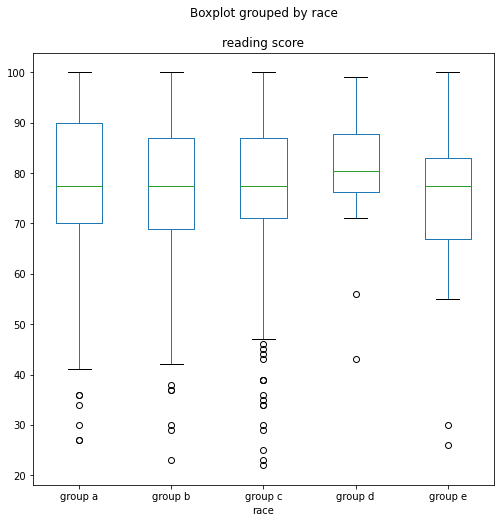

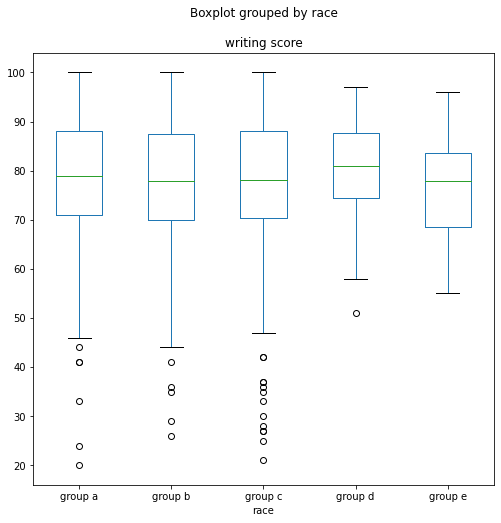

In [175]:
df['race'] = df['race'].str.lower()
df['race'].dropna()


df.boxplot(by='race',column=['math score'],grid=False,figsize=(8,8))
df.boxplot(by='race', column=['reading score'], grid=False, figsize=(8, 8))
df.boxplot(by='race',column=['writing score'],grid=False,figsize=(8,8))

<style type='text/css'>

*{font-size: 22px;
color:orange
}
</style>
<p>Group C has the most outliers in each score category</p>